In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import folium
import colorsys
from time import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score

In [2]:
df = pd.read_csv('titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
def nulls_summary_table(data):
    """this function to see precentage of nulls in column"""
    null_values = pd.DataFrame(data.isnull().sum())
    null_values[1] = null_values[0]/len(data)*100
    null_values.columns = ['Nulls Count','Nulls Percentage %']
    print(null_values)
    
nulls_summary_table(df)

             Nulls Count  Nulls Percentage %
PassengerId            0            0.000000
Survived               0            0.000000
Pclass                 0            0.000000
Name                   0            0.000000
Sex                    0            0.000000
Age                  177           19.865320
SibSp                  0            0.000000
Parch                  0            0.000000
Ticket                 0            0.000000
Fare                   0            0.000000
Cabin                687           77.104377
Embarked               2            0.224467


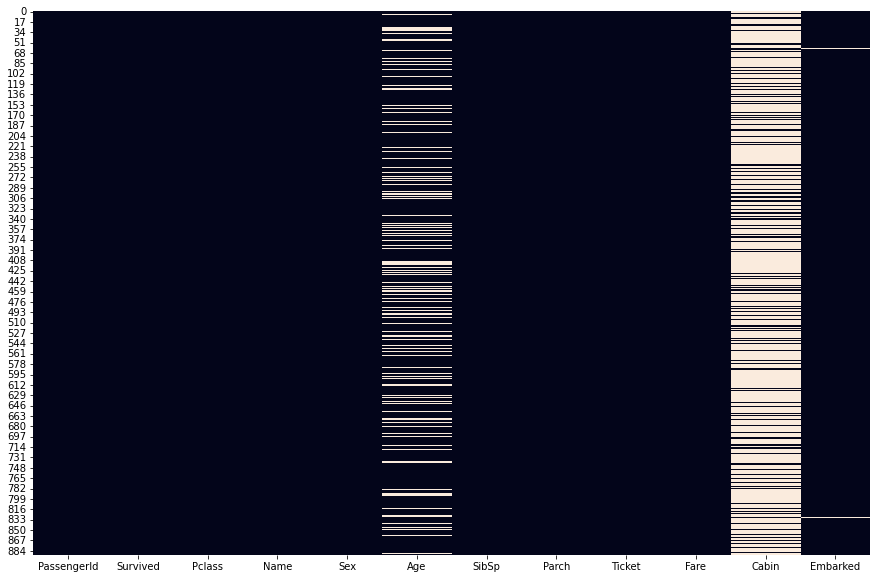

In [4]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.isnull(),cbar=False)
plt.show()

In [5]:
del df['Cabin']

In [6]:
# 'Cabin' deleted because more than 75% is empty and no correlation found with the label and the features either.

In [7]:
def showCorrelationOnData(data,*,threshold=None):
    sns.set_theme(style="white")
    corr = data.corr()
    if threshold:
        corr = data.corr()[(data.corr() >= threshold) | (data.corr() <= -threshold)]
    mask = np.triu(np.ones_like(corr, dtype=bool))
    f, ax = plt.subplots(figsize=(10,10))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0,square=True, linewidths=.5, \
                cbar_kws={"shrink": .5}, annot=True, annot_kws={"fontsize":12})
    plt.show()

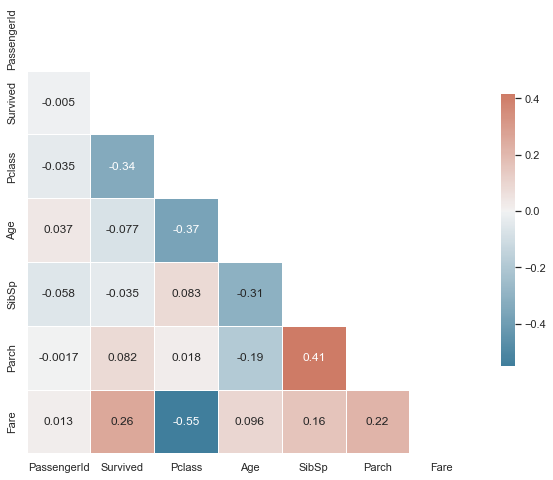

In [8]:
showCorrelationOnData(df)#,threshold=0.75)

In [9]:
def checkImbalancedData(data,columnOfInterset):
    print(data[columnOfInterset].value_counts(normalize=True))

In [10]:
checkImbalancedData(df,'Survived')

0    0.616162
1    0.383838
Name: Survived, dtype: float64


<Figure size 1080x720 with 0 Axes>

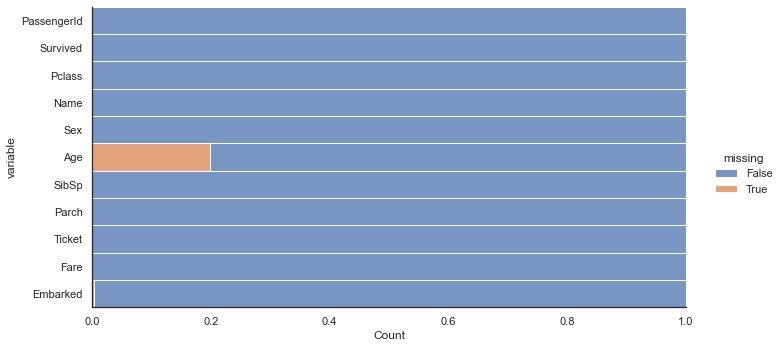

In [11]:
# try to solve the nulls in age column
plt.figure(figsize=(15,10))
sns.displot(data=df.isna().melt(value_name="missing"),y="variable",hue="missing",multiple="fill",aspect=2)
plt.show()

In [12]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

C:\Users\amira\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


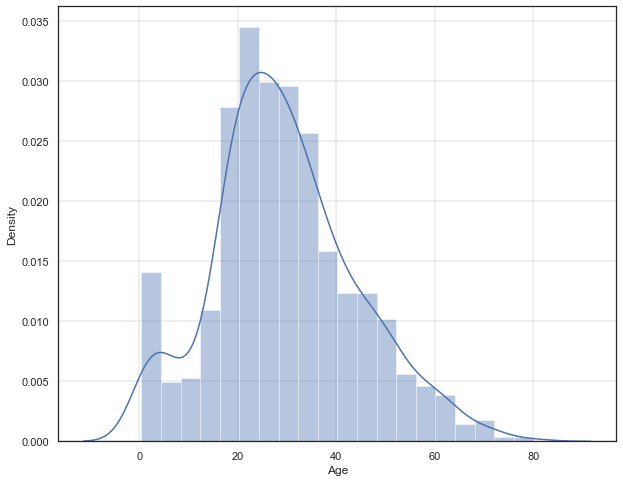

In [13]:
plt.figure(figsize=(10, 8))
plt.grid(color='gray', linestyle='-', linewidth=0.25)
sns.distplot(df['Age'])
plt.show()

In [14]:
# SomeHow normally distributed so we can fill it with the mean safely

In [15]:
df['Age'] = df['Age'].fillna(df.Age.mean())

In [16]:
nulls_summary_table(df)

             Nulls Count  Nulls Percentage %
PassengerId            0            0.000000
Survived               0            0.000000
Pclass                 0            0.000000
Name                   0            0.000000
Sex                    0            0.000000
Age                    0            0.000000
SibSp                  0            0.000000
Parch                  0            0.000000
Ticket                 0            0.000000
Fare                   0            0.000000
Embarked               2            0.224467


In [17]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
# categorical Column we should fill it with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [19]:
# last check of nulls
nulls_summary_table(df)

             Nulls Count  Nulls Percentage %
PassengerId            0                 0.0
Survived               0                 0.0
Pclass                 0                 0.0
Name                   0                 0.0
Sex                    0                 0.0
Age                    0                 0.0
SibSp                  0                 0.0
Parch                  0                 0.0
Ticket                 0                 0.0
Fare                   0                 0.0
Embarked               0                 0.0


In [20]:
# No nulls start encoding categorical features

In [21]:
cat_columns = df.describe(include='O')
cat_columns

,Name,Sex,Ticket,Embarked
count,891,891,891,891
unique,891,2,681,3
top,"Braund, Mr. Owen Harris",male,347082,S
freq,1,577,7,646


In [22]:
# Column Name won't affect the result
del df['Name']

In [23]:
cat_columns = df.describe(include='O')
cat_columns

,Sex,Ticket,Embarked
count,891,891,891
unique,2,681,3
top,male,347082,S
freq,577,7,646


In [24]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [25]:
# delete ticket column like name will not affect the result
del df['Ticket']

In [26]:
cat_columns = df.describe(include='O')
cat_columns

,Embarked
count,891
unique,3
top,S
freq,646


In [27]:
df_encoding = pd.get_dummies(df)

In [28]:
df_encoding.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,0,0,1
1,2,1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,3,1,26.0,0,0,7.9250,0,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,0,1


In [29]:
def splitData(data,columnOfinterset,*,normalize = False):
    x = data.drop(columnOfinterset,axis=1).values
    y = data[columnOfinterset].values
    y = y.reshape(-1,1)
    if normalize:
        scaler = MinMaxScaler()
        scaler.fit(x)
        x = scaler.fit_transform(x)
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=1)
    return x_train,x_test,y_train,y_test

def checkShape(*args):
    for arg in args:
        print(arg.shape)
        
X_train,X_test,y_train,y_test = splitData(df_encoding,'Survived',normalize=True)
checkShape(X_train,X_test,y_train,y_test)

(596, 10)
(295, 10)
(596, 1)
(295, 1)


In [30]:
def classificationAnalysis(model,x1,x2,y1,y2):
    def ClassficationMetricsReport(y1,y2,*,kind='test'):
        error_1 = accuracy_score(y1,y2)
        error_2 = f1_score(y1,y2)
        error_3 = precision_score(y1,y2)
        error_4 = recall_score(y1,y2)
        print(f'\t\taccuracy_score({kind}): {100*error_1:0.3f}%')
        print(f'\t\tf1_score({kind}): {100*error_2:0.3f}%')
        print(f'\t\tprecision_score({kind}): {100*error_3:0.3f}%')
        print(f'\t\trecall_score({kind}): {100*error_4:0.3f}%')
    model.fit(x1,y1)
    y1_pred = model.predict(x1)
    y2_pred = model.predict(x2)
    print(f'----{model.__class__.__name__} classification-------\n')
    print('\t----Train Error-------\n')
    ClassficationMetricsReport(y1_pred,y1,kind='train')
    print()
    print('\t----Test Error-------\n')
    ClassficationMetricsReport(y2_pred,y2)
    print()
    print()

In [31]:
knn = KNeighborsClassifier(n_neighbors=7)
reg = LogisticRegression()
dt = DecisionTreeClassifier()
algs = [knn,reg,dt]

In [32]:
reports = []
for alg in algs:
    reports.append(classificationAnalysis(alg,X_train,X_test,y_train,y_test))

----KNeighborsClassifier classification-------

	----Train Error-------

		accuracy_score(train): 85.235%
		f1_score(train): 78.537%
		precision_score(train): 72.851%
		recall_score(train): 85.185%

	----Test Error-------

		accuracy_score(test): 75.593%
		f1_score(test): 66.355%
		precision_score(test): 58.678%
		recall_score(test): 76.344%


----LogisticRegression classification-------

	----Train Error-------

		accuracy_score(train): 81.544%
		f1_score(train): 74.419%
		precision_score(train): 72.398%
		recall_score(train): 76.555%

	----Test Error-------

		accuracy_score(test): 77.288%
		f1_score(test): 71.245%
		precision_score(test): 68.595%
		recall_score(test): 74.107%


----DecisionTreeClassifier classification-------

	----Train Error-------

		accuracy_score(train): 100.000%
		f1_score(train): 100.000%
		precision_score(train): 100.000%
		recall_score(train): 100.000%

	----Test Error-------

		accuracy_score(test): 74.237%
		f1_score(test): 66.071%
		precision_score(test)

C:\Users\amira\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\amira\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
def ClassficationMetricsReportd(y1,y2,*,kind='test'):
    error_1 = accuracy_score(y1,y2)
    error_2 = f1_score(y1,y2)
    error_3 = precision_score(y1,y2)
    error_4 = recall_score(y1,y2)
    return {'accuracy_score': 100*error_1,'f1_score': 100*error_2,'precision_score': 100*error_3,'recall_score': 100*error_4}
def classificationAnalysisd(model,x1,x2,y1,y2):
    model.fit(x1,y1)
    y1_pred = model.predict(x1)
    y2_pred = model.predict(x2)
    dictionary_report = {}
    dictionary_report [model.__class__.__name__ + "_Train Error"] = ClassficationMetricsReportd(y1_pred,y1,kind='train')
    dictionary_report [model.__class__.__name__ + "_Test Error"] = ClassficationMetricsReportd(y2_pred,y2)
    return dictionary_report
 

In [34]:
reports_ = []
for alg in algs:
    reports_.append(classificationAnalysisd(alg,X_train,X_test,y_train,y_test))

C:\Users\amira\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\amira\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


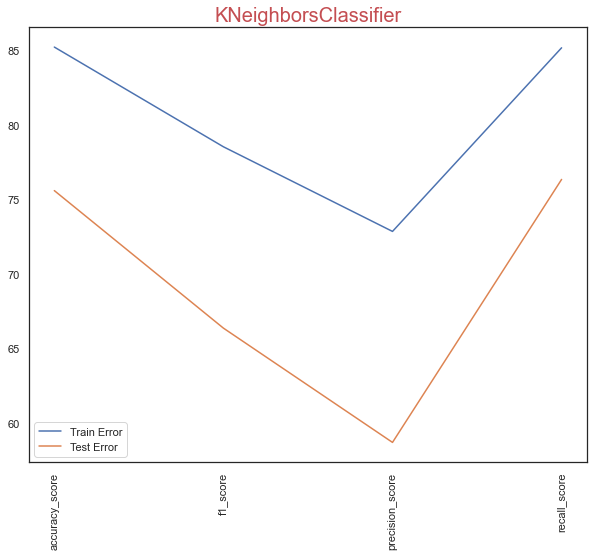

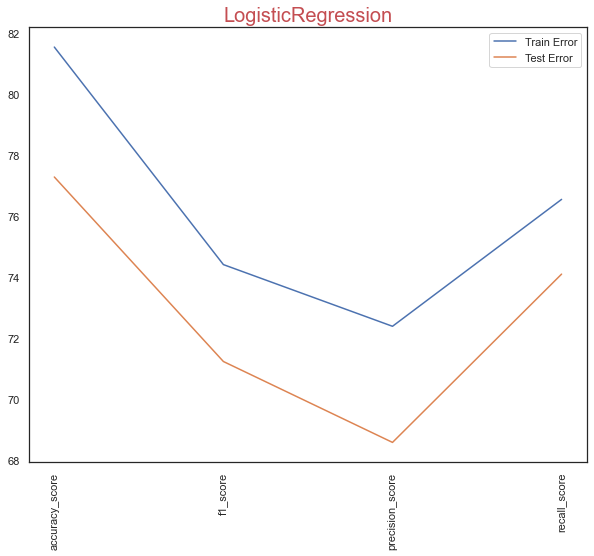

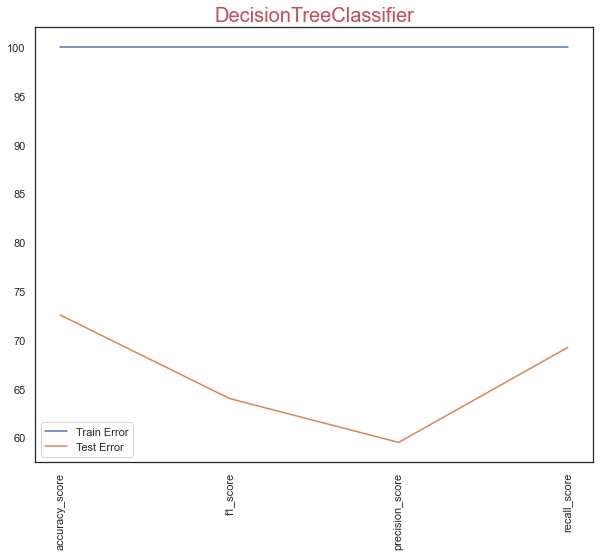

In [35]:
for n in range(len(algs)):
    plt.figure(figsize=(10,8))
    plt.plot(list(reports_[n].values())[0].keys(), list(reports_[n].values())[0].values(),label='Train Error')
    plt.plot(list(reports_[n].values())[1].keys(), list(reports_[n].values())[1].values(),label='Test Error')
    plt.xticks(rotation = 90)
    title = list(reports_[n].keys())[0].split("_")[0]
    plt.title(title,fontdict={'fontsize':20},color='r')
    plt.legend()
    plt.show()